Processing sub-011


/home/a1/fsl/lib/python3.11/site-packages/nilearn/maskers/multi_nifti_maps_masker.py:223: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(imgs)


(240, 64)
(64, 64)
Processing sub-031


KeyboardInterrupt: 

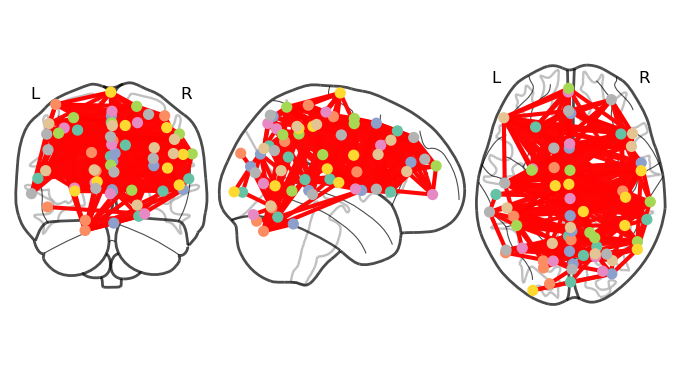

In [25]:

# Set up FSL environment
fsl_path = "/home/a1/fsl"
os.environ["FSLDIR"] = fsl_path
os.environ["PATH"] += os.pathsep + os.path.join(fsl_path, "bin")
os.environ["FSLOUTPUTTYPE"] = "NIFTI_GZ"

# Define base directory where the BIDS data is stored
BASE_DIR = "/home/a1/Desktop/Projects/depression/derivatives/MDD"

# Path to the list of subjects file
SUBJECT_LIST = "/home/a1/Desktop/Projects/code/mdd_list.txt"

OUT_NC='/home/a1/Desktop/Projects/depression/conn/HC'
OUT_MD='/home/a1/Desktop/Projects/depression/conn/MDD'

# Read the list of subjects
with open(SUBJECT_LIST, 'r') as file:
    subjects = file.read().splitlines()

# Loop over each subject in the list
for SUBJ_ID in subjects:
    SUBJ_ID = f"sub-{SUBJ_ID}"
    print(f"Processing {SUBJ_ID}")

    # Define subject directory
    SUBJ_DIR = os.path.join(BASE_DIR, SUBJ_ID)

    # Define file paths
    #ATLAS = '/home/a1/Desktop/Projects/template/gordon333MNI.nii.gz'
    #MNI = '/home/a1/Desktop/Projects/template/MNI152_T1_2mm_brain.nii.gz'
    FUNC =   os.path.join(SUBJ_DIR, 'func', f"{SUBJ_ID}_task-restingsz_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz")
    FUNC_path = os.path.join(SUBJ_DIR, 'func')
    CONFOUND = os.path.join(SUBJ_DIR, 'func', f"{SUBJ_ID}_task-restingsz_desc-confounds_timeseries.tsv")
    #ATLAS_NODE=  '/home/a1/Desktop/Projects/template/gordon333NodeNames.txt'

    #gordon_atals_img = nib.load(ATLAS)
    #atlas_data = gordon_atals_img.get_fdata()
    #mni_image = nib.load(MNI)
    #unique_labels = np.unique(atlas_data)


    resting_state_img =nib.load(FUNC)
    dim=64
    difumo=datasets.fetch_atlas_difumo(dimension=dim,resolution_mm=2,legacy_format=False)
    masker = MultiNiftiMapsMasker(maps_img=difumo.maps,standardize_confounds= "zscore_sample",memory="nilearn_cache",
    n_jobs=2,)

    confounds_simple, sample_mask = nilearn.interfaces.fmriprep.load_confounds(FUNC) 

    timeseries = masker.fit_transform(resting_state_img,confounds=confounds_simple)
    # Check if the T1w image exists
    print(timeseries.shape)

    correlation_measure =  ConnectivityMeasure(kind='correlation')
    conn_matrix = correlation_measure.fit_transform([timeseries])[0]
    print(conn_matrix.shape)
    
    
    coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=difumo.maps)

    plotting.plot_connectome(conn_matrix,coordinates,edge_threshold="85%")

    df =pd.DataFrame(conn_matrix)

    df.to_csv(f"{OUT_MD}/sub-{SUBJ_ID}_functional_connectivity_matrix.csv")

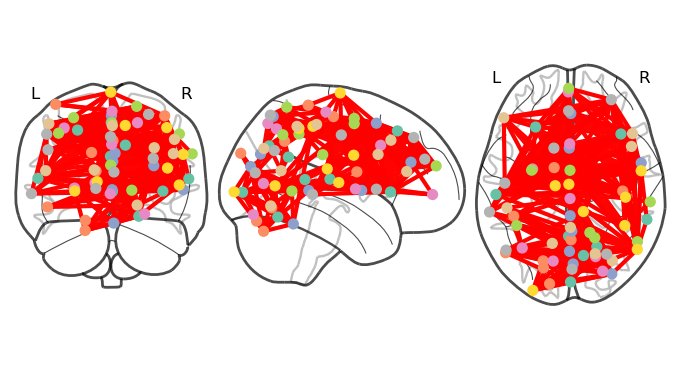

In [22]:
 plotting.plot_connectome(conn_matrix,coordinates,edge_threshold="85%")

In [18]:
import os
import nilearn
import subprocess
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.input_data import NiftiLabelsMasker
import nibabel as nib
from nilearn.connectome import ConnectivityMeasure
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting

In [10]:
import os
import glob 
import shutil
import os
import subprocess
from nilearn.interfaces.fmriprep import load_confounds_strategy
from nilearn.interfaces.fmriprep import load_confounds_strategy
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker  # Import the required class
from nilearn.input_data import load_confounds  # Import the required class

from nilearn.maskers import MultiNiftiMapsMasker
from nilearn import datasets

ImportError: cannot import name 'load_confounds' from 'nilearn.input_data' (/home/a1/fsl/lib/python3.11/site-packages/nilearn/input_data/__init__.py)

In [195]:
SUBJECT_LIST = "/home/a1/Desktop/Projects/code/mdd_list.txt"

def load_matrix(file_list):
    matrices = []
    for file in file_list:
        if not os.path.exists(file):
            print(f"File does not exsist: {file}")
        matrix = pd.read_csv(file)
        matrices.append(matrix.iloc[:,1:].values)
    return np.array(matrices)

OUT_MD='/home/a1/Desktop/Projects/depression/conn/MDD'
OUT_HC='/home/a1/Desktop/Projects/depression/conn/HC'

SUBJECT_LIST_MD = "/home/a1/Desktop/Projects/code/mdd_list.txt"
SUBJECT_LIST_HC = "/home/a1/Desktop/Projects/code/hc_list.txt"
#####################################################################
# Read the list of subjects
with open(SUBJECT_LIST_MD, 'r') as file:
    subjects_md = file.read().splitlines()
    # Define subject directory   
subject_files_md = [f'{OUT_MD}/sub-{SUBJ_ID}_functional_connectivity_matrix.csv' for SUBJ_ID in subjects_md]


all_matrix_md =  load_matrix(subject_files_md)
n_subjects_md =len(all_matrix_md)


print(n_subjects_md)

##################################################HC

# Read the list of subjects
with open(SUBJECT_LIST_HC, 'r') as file:
    subjects_hc = file.read().splitlines()
    # Define subject directory   
subject_files_hc = [f'{OUT_HC}/sub-{SUBJ_ID}_functional_connectivity_matrix.csv' for SUBJ_ID in subjects_hc]


all_matrix_hc =  load_matrix(subject_files_hc)
n_subjects_hc =len(subject_files_hc)
print(n_subjects_hc)

45
45


In [196]:
all_matrix_hc

array([[[1.        , 0.09647901, 0.09089851, ..., 0.09528694,
         0.09578466, 0.08745608],
        [0.09647901, 1.        , 0.0922758 , ..., 0.09433008,
         0.09480719, 0.08810049],
        [0.09089851, 0.0922758 , 1.        , ..., 0.0862721 ,
         0.09032852, 0.08735798],
        ...,
        [0.09528694, 0.09433008, 0.0862721 , ..., 1.        ,
         0.09739421, 0.08967273],
        [0.09578466, 0.09480719, 0.09032852, ..., 0.09739421,
         1.        , 0.09274584],
        [0.08745608, 0.08810049, 0.08735798, ..., 0.08967273,
         0.09274584, 1.        ]],

       [[1.        , 0.04442582, 0.04435073, ..., 0.0442615 ,
         0.04495216, 0.04475961],
        [0.04442582, 1.        , 0.0451407 , ..., 0.0447984 ,
         0.04503531, 0.04563576],
        [0.04435073, 0.0451407 , 1.        , ..., 0.04376137,
         0.04427393, 0.04528098],
        ...,
        [0.0442615 , 0.0447984 , 0.04376137, ..., 1.        ,
         0.04550681, 0.04540138],
        [0.0

In [197]:
from scipy import stats
numrois = all_matrix_hc.shape[1]  # (n_sub) n_roi, n_roi
p_values = np.zeros((numrois,numrois))

for i in range(numrois):
    for j in range(numrois):
        tsat,pval = stats.ttest_ind(all_matrix_hc[:,i,j], all_matrix_md[:,i,j])
        p_values[i,j] = pval


/home/a1/fsl/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#create a DataFrame for the resutls
ROI_name = matrix.iloc[:,0]
p_values_df = pd.DataFrame(p_values, columns=ROI_name, index = ROI_name)

with open('/home/a1/Desktop/Projects/template/gordon333NodeNames.txt', 'r') as file:
    ROI_name = file.read().splitlines()

In [20]:
with open('/home/a1/Desktop/Projects/template/gordon333NodeNames.txt', 'r') as file:
    ROI_name = file.read().splitlines()
ROI_name =np.array(ROI_name)
p_values_df = pd.DataFrame(p_values, columns=ROI_name, index = ROI_name)

In [23]:
p_values_df.to_csv(f"{OUT_MD}/sifintant_p.csv")

In [ ]:
alpha = 0.05
sig_mask = p_values < alpha
sig_results = p_values_df.where(sig_mask)
print(sig_results)

In [ ]:
from scipy.stats import ttest_ind
import statsmodels
flat_p_values = p_values.flatten()

_, corrected_flat_p_values, _,_ = statsmodels.stats.multitest.multipletests(flat_p_values, method='fdr_bh')

In [ ]:
corrected_flat_p_matrix = corrected_flat_p_values.reshape(p_values.shape)

In [ ]:
corrected_flat_p_matrix_df = pd.DataFrame(corrected_p_values_matrix, columns= ROI_name, index =ROI_name)

In [ ]:
corrected_flat_p_matrix_df
alpha = 0.01
sig_mask=corrected_flat_p_matrix < alpha
sig_resuts = corrected_flat_p_matrix_df.where(sig_mask)

In [ ]:
sig_resuts.to_csv(f"{OUT_MD}/sub-{SUBJ_ID}_coorected.csv")

In [ ]:
num_test = p_values_df.size
ad_p_values = p_values_df.values * num_test

In [ ]:
ad_p_values =np.clip(ad_p_values,0,1)

In [ ]:
ad_p_values_df =  pd.DataFrame(ad_p_values, columns= ROI_name, index =ROI_name)

In [ ]:
alpha = 0.01
sig_mask=ad_p_values_df < alpha
sig_resuts = ad_p_values_df.where(sig_mask)

In [ ]:
    sig_resuts.to_csv(f"{OUT_MD}/sub-{SUBJ_ID}_boff.csv")

In [110]:
with open('/home/a1/Desktop/Projects/template/gordon333CommunityAffiliation.1D','r') as f:
    roi_to_commnity = [int(line.strip() for line in f.readlines())]



TypeError: int() argument must be a string, a bytes-like object or a real number, not 'generator'

In [28]:
roi_to_commnity_df = pd.DataFrame(roi_to_commnity, columns=['Community'])
p_values_df.index = ROI_name
p_values_df.columns = ROI_name

In [ ]:
all_matrix_md
all_matrix_hc

In [29]:
cobine_df = pd.DataFrame(p_values_df.values, index = p_values_df.index, columns =p_values_df.columns)
cobine_df.index = roi_to_commnity
cobine_df.columns = roi_to_commnity
mask = [label != '13' for label in roi_to_commnity]
 = cobine_df.loc[mask,mask]

In [36]:
alpha=0.05
sig = cobine_df <= alpha
sg_df = cobine_df.where(sig)

In [90]:
group_df = cobine_df.groupby(cobine_df.index).sum()

In [71]:
group_results = {}
for community in set(roi_to_commnity.values()):
    rois = [roi for roi, comm in items[roi_to_commnity] if comm == community]
    


AttributeError: 'list' object has no attribute 'values'

In [75]:
group_df

,1,2,3,1,4,1,5,4,5,6,...,1,1,1,5,5,6,6,1,10,10
1,6.362728,5.934205,6.984378,6.171256,6.580894,4.805159,6.322871,6.479091,6.347250,5.604738,...,5.409263,6.249001,7.115711,5.575747,5.255429,3.772497,5.583676,2.809066,4.764007,7.628244
10,3.847653,3.478624,3.323845,2.674825,3.720183,3.355766,3.153835,4.034175,4.855417,3.841155,...,2.168603,2.788319,3.289441,2.305074,2.094451,2.739096,3.475745,2.272457,2.907694,4.172998
11,0.670974,0.562070,0.666352,0.665118,0.704701,0.462610,0.644538,0.627815,0.717735,0.556547,...,0.540362,0.649276,0.715096,0.476015,0.444917,0.358950,0.627098,0.286018,0.528463,0.804551
12,6.252061,5.315297,6.729312,5.120331,5.384007,4.926770,5.390388,5.320834,5.664219,5.240263,...,4.598440,5.285283,6.427626,4.938924,5.005567,3.208217,4.585553,2.342641,3.789821,6.735465
2,6.578953,5.888480,6.869575,4.565115,4.765284,5.707136,5.554963,5.961495,6.016199,5.424269,...,4.170313,4.442659,5.863385,4.402839,4.364533,3.287409,4.294579,2.258157,3.304363,7.033922
3,1.646074,1.417427,1.388344,1.477940,1.323203,1.364476,1.399942,1.341876,1.615406,1.335522,...,1.330370,1.350632,1.600350,1.454454,1.394215,0.853646,1.155548,0.493123,0.776184,1.544112
4,7.748159,6.253419,6.499422,5.156821,6.510324,7.484113,7.261434,6.762706,9.493147,7.413852,...,4.472923,5.810386,6.839383,4.322976,4.433168,5.756056,7.936823,5.015979,6.486824,11.421931
5,3.857528,3.232847,4.425709,4.235116,3.901297,2.811801,3.562715,3.607997,3.194686,3.160705,...,3.645907,4.046230,4.623894,3.401718,3.142542,2.005669,2.981822,1.280503,2.522242,4.300505
6,4.676570,3.924167,3.582189,2.344224,3.913473,4.440389,2.954382,4.377051,6.309216,4.545912,...,1.732952,2.522481,3.072254,2.030889,2.054213,3.355753,4.132256,3.263081,4.598041,5.871206
7,0.998959,0.843880,1.027771,0.706812,0.900397,0.815070,0.858023,0.795962,0.888661,0.883945,...,0.677193,0.819473,1.013850,0.733956,0.724877,0.566290,0.735696,0.459463,0.645386,1.200758


In [66]:
roi_to_commnity =np.array(roi_to_commnity)

Multiple test

In [199]:
flatten = group_df.values.flatten()
non_nan_mask = ~np.isnan(flatten)
filter_flateen1=flatten[non_nan_mask]

from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
np.savetxt('d.csv',correct_final)
%pwd
reject,correct_final,_,_ = statsmodels.stats.multitest.multipletests(filter_flateen1, method='fdr_bh')
non_one_values = correct_final[correct_final<1]

In [93]:
reject

array([False, False, False, ..., False, False, False])

In [198]:
flatten = cobine_df.values.flatten()
non_nan_mask = ~np.isnan(flatten)
filter_flateen1=flatten[non_nan_mask]

%pwd
reject,correct_final,_,_ = statsmodels.stats.multitest.multipletests(filter_flateen1, method='fdr_bh')
non_one_values = correct_final[correct_final<1]
np.savetxt('d.csv',correct_final)


In [159]:
num_comm=13
p_values = []
for roi1 in range(13):
    for roi2 in range(13):
        if roi1!=roi2:
            f_stat, p_val=stats.f_oneway(grouped_matrix[:,roi1,roi2])
            p_values.append(p_val)
    

NameError: name 'grouped_matrix' is not defined

In [84]:
sig_indices =np.where(correct_final<0.05)[0]

In [85]:
sigdd = correct_final[sig_indices]

In [94]:
group_df = cobine_df.groupby(all_matrix_hc.index).sum()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [97]:
roi_to_commnity_df = pd.DataFrame(roi_to_commnity, columns=['Community'])
roi_to_commnity_df.index = roi_to_commnity
roi_to_commnity_df.columns = roi_to_commnity

In [201]:
summed_matrix = np.zeros((45,13,13))
for subj in range(all_matrix_hc.shape[0]):
    for roi1 in range(all_matrix_hc.shape[1]):
        for roi2 in range(all_matrix_hc.shape[2]):
            comm1 = np.where(roi_to_commnity == roi1)[0]
            comm2 = np.where(roi_to_commnity == roi2)[0]
            if comm1.size >0  and comm2.size >0:
                summed_matrix[subj,int(roi1)-1,int(roi2)-1] = np.sum(
                    all_matrix_hc[subj,comm1[:,None], comm2])        

In [200]:
0

0

In [129]:
roi_to_commnity = pd.read_csv('/home/a1/Desktop/Projects/template/gordon333CommunityAffiliation.1D', header=None).values.flatten()

In [202]:
summed_matrix_md = np.zeros((45,13,13))
for subj in range(all_matrix_hc.shape[0]):
    for roi1 in range(all_matrix_hc.shape[1]):
        for roi2 in range(all_matrix_hc.shape[2]):
            comm1 = np.where(roi_to_commnity == roi1)[0]
            comm2 = np.where(roi_to_commnity == roi2)[0]
            if comm1.size >0  and comm2.size >0:
                summed_matrix_md[subj,int(roi1)-1,int(roi2)-1] = np.sum(
                    all_matrix_md[subj,comm1[:,None], comm2])        

In [190]:
flatten = p_values.flatten()
non_nan_mask = ~np.isnan(flatten)
filter_flateen1=flatten[non_nan_mask]

%pwd
reject,correct_final,_,_ = statsmodels.stats.multitest.multipletests(filter_flateen1, method='fdr_bh')
non_one_values = correct_final[correct_final<1]
np.savetxt('d.csv',correct_final)



In [191]:
non_one_values

array([0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18904929, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538786,
       0.18538786, 0.18538786, 0.18538786, 0.18538786, 0.18538

In [204]:
from scipy import stats
numrois = all_matrix_hc.shape[1]  # (n_sub) n_roi, n_roi
p_values = np.zeros((13,13))

for i in range(13):
    for j in range(13):
        tsat,pval = stats.ttest_ind(summed_matrix[:,i,j], summed_matrix_md[:,i,j])
        p_values[i,j] = pval

In [207]:
p_values

array([[       nan, 0.20410135, 0.19781999, ..., 0.10319224, 0.14083441,
        0.30053212],
       [0.20410135,        nan, 0.16147173, ..., 0.08545123, 0.13356246,
        0.28283498],
       [0.19781999, 0.16147173,        nan, ..., 0.06513477, 0.0969899 ,
        0.17810905],
       ...,
       [0.10319224, 0.08545123, 0.06513477, ...,        nan, 0.25418809,
        0.14681608],
       [0.14083441, 0.13356246, 0.0969899 , ..., 0.25418809,        nan,
        0.15343497],
       [0.30053212, 0.28283498, 0.17810905, ..., 0.14681608, 0.15343497,
               nan]])

In [206]:
from scipy import stats
numrois = all_matrix_hc.shape[1]  # (n_sub) n_roi, n_roi
p_values = np.zeros((numrois,numrois))

for i in range(numrois):
    for j in range(numrois):
        tsat,pval = stats.ttest_ind(all_matrix_hc[:,i,j], all_matrix_md[:,i,j])
        p_values[i,j] = pval
